# Caterpillar Tube Pricing
## Environment : Python 3
## Author : Arion

in this notebook, we will use some unsupervised learning methods and analyze the differences before/after PCA

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_rows', 1000)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
train=pd.read_csv('../output/combination.csv')
train.quote_date = pd.to_datetime(train.quote_date)
train["year"] = train.quote_date.dt.year
train["month"] = train.quote_date.dt.month
train["day"] = train.quote_date.dt.day
train["day_of_week"] = train.quote_date.dt.dayofweek
data = train.select_dtypes(include=['int', 'float']).copy()
data.replace(np.nan, 0, inplace=True)
data.drop(['cost'], axis=1, inplace=True)
data_columns=data.columns.tolist()

# PCA

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
np.set_printoptions(suppress=True)

# it is important to perform feature scaling before PCA
scaler=StandardScaler().fit(data.values)
scale_data=scaler.transform(data)

pca=PCA(n_components=13)
pca.fit(scale_data)
print((np.around(pca.explained_variance_ratio_, decimals=7)))

[ 0.1439825  0.1054679  0.0856404  0.0827789  0.0615793  0.0589582
  0.0573412  0.0531985  0.0507421  0.0492813  0.0468882  0.0447302
  0.0394631]


[ 0.14398254  0.24945044  0.33509088  0.41786976  0.47944902  0.5384072
  0.59574838  0.64894692  0.69968902  0.74897033  0.79585858  0.84058878
  0.88005185]


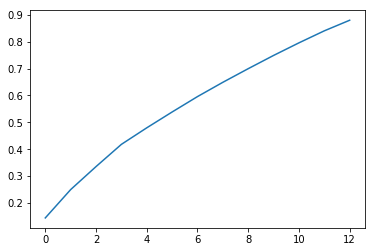

In [4]:
print(np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [5]:
print("data shape before pca transform is {}".format(data.shape))
data_pca=pca.transform(scale_data)
print("data shape after pca transform is{}".format(data_pca.shape))

data shape before pca transform is (30213, 18)
data shape after pca transform is(30213, 13)


In [6]:
# reconstruct dataframe with scaled data
data=pd.DataFrame(data=scale_data, columns=data_columns)
data.head(5)

,annual_usage,min_order_quantity,quantity,diameter,wall,length,num_bends,bend_radius,num_boss,num_bracket,other,type_totals,component_totals,spec_totals,year,month,day,day_of_week
0,-0.075689,-0.163601,-0.528395,-0.599868,-1.05666,0.622378,1.903563,-0.709165,-0.136529,-0.050838,-0.090186,-1.03955,-0.787636,-0.443042,0.349835,-0.040316,-0.09572,1.258896
1,-0.075689,-0.163601,-0.514263,-0.599868,-1.05666,0.622378,1.903563,-0.709165,-0.136529,-0.050838,-0.090186,-1.03955,-0.787636,-0.443042,0.349835,-0.040316,-0.09572,1.258896
2,-0.075689,-0.163601,-0.471866,-0.599868,-1.05666,0.622378,1.903563,-0.709165,-0.136529,-0.050838,-0.090186,-1.03955,-0.787636,-0.443042,0.349835,-0.040316,-0.09572,1.258896
3,-0.075689,-0.163601,-0.401205,-0.599868,-1.05666,0.622378,1.903563,-0.709165,-0.136529,-0.050838,-0.090186,-1.03955,-0.787636,-0.443042,0.349835,-0.040316,-0.09572,1.258896
4,-0.075689,-0.163601,-0.189222,-0.599868,-1.05666,0.622378,1.903563,-0.709165,-0.136529,-0.050838,-0.090186,-1.03955,-0.787636,-0.443042,0.349835,-0.040316,-0.09572,1.258896


In [7]:
PCs=[]
for i in range(1,14):
    PCs.append('PC'+str(i))
               
pca_data=pd.DataFrame(data=data_pca, columns=PCs)

In [8]:
data_withPCs=pd.concat([data, pca_data], axis=1)
features_PC_correlation=data_withPCs.corr().filter(PCs).drop(PCs)
features_PC_correlation.sort_values(by='PC1', ascending=False)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
diameter,0.859948,-0.075222,-0.095444,-0.031766,-0.081679,0.023198,0.135360,0.020260,-0.003522,-0.003516,0.030869,0.048496,-0.001458
bend_radius,0.795688,-0.028907,-0.213396,0.085459,-0.084052,0.025120,0.068180,0.027839,-0.022034,-0.046074,0.037246,0.158328,0.072789
wall,0.566775,0.410400,-0.210149,0.148141,0.103229,-0.117276,-0.069270,0.076127,0.084904,-0.128413,-0.007896,0.320299,0.258190
num_boss,0.351290,0.153983,0.011159,0.145322,-0.265057,0.008920,0.643815,-0.127821,-0.248564,0.160084,-0.195921,-0.375679,-0.125665
spec_totals,0.211113,0.061098,0.438502,0.147196,0.215425,-0.070999,-0.063647,-0.250130,-0.479950,0.036789,0.598645,-0.029217,0.110120
min_order_quantity,0.167079,-0.001524,0.126859,0.049436,0.649477,0.217848,0.213932,-0.255597,0.341269,-0.358593,-0.046321,-0.305296,0.116136
other,0.145199,0.228255,0.111098,0.149222,-0.269970,0.569042,-0.060867,0.084998,0.469694,0.271368,0.404564,-0.090231,-0.110324
num_bracket,0.134143,0.084448,0.141740,0.059736,-0.199958,0.622718,-0.356263,-0.016697,-0.380569,-0.412085,-0.272288,-0.043166,-0.036377
month,0.069514,0.263161,-0.527935,-0.113217,0.127316,-0.009901,-0.381557,-0.093830,-0.044807,0.304771,-0.084064,-0.450474,0.266776
annual_usage,0.043932,0.010560,0.186025,0.054596,0.483289,0.222229,0.139077,0.731109,-0.203757,0.261279,-0.101732,0.011371,0.028007


# Kmeans

In [9]:
# Improved version of cluster_results function of the visualisation script
# This displays the sample index when the marker of sample are displayed
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def cluster_results(reduced_data, preds, centers):
    '''
    Visualizes the PCA-reduced cluster data in two dimensions
    Adds cues for cluster centers and student-selected sample data
    '''

    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = 'PC1', y = 'PC2', \
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

    # Set plot title
    ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");

In [10]:
data_withPCs["supplier"] = train["supplier"]

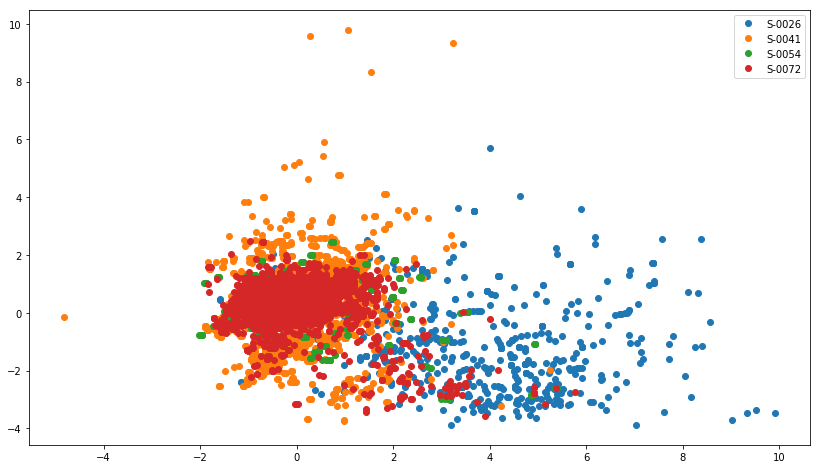

In [11]:
# pick 4 top suppliers, and plot them alongside PC1 and PC2 axis
top_suppliers=['S-0026','S-0041','S-0072','S-0054']

match=(data_withPCs.supplier=='S-0026') | (data_withPCs.supplier=='S-0041') |\
        (data_withPCs.supplier=='S-0072') | (data_withPCs.supplier=='S-0054')
top_suppliers_data=data_withPCs.loc[match].copy()

# plot the four supplier on scatter plot
groups=top_suppliers_data.groupby('supplier')
fig, ax = plt.subplots(figsize = (14,8))
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.PC1, group.PC2, marker='o',linestyle='',label=name)
ax.legend()
plt.show()

In [12]:
top_suppliers_data.drop("supplier", axis=1, inplace=True)

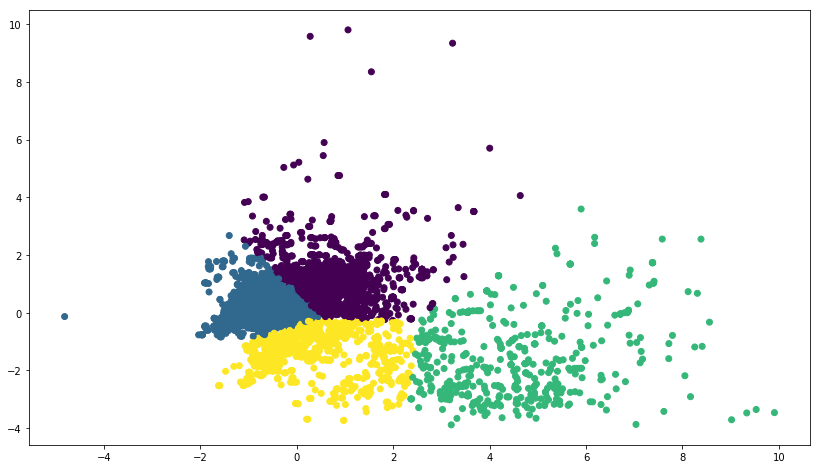

In [13]:
from sklearn.cluster import KMeans
clusterer=KMeans(n_clusters=4, random_state=0)
kmean_preds=clusterer.fit_predict(top_suppliers_data[['PC1','PC2']])    

# find the cluster centers 
centers=clusterer.cluster_centers_
top_suppliers_data['cluster']=kmean_preds

fig, ax = plt.subplots(figsize = (14,8))
plt.scatter(top_suppliers_data.PC1, top_suppliers_data.PC2, c=top_suppliers_data.cluster)

# present the efficacy of PCA and Kmeans

## PCA 

In [14]:
data = pd.read_csv("../output/combination.csv")

In [15]:
data.quote_date = pd.to_datetime(data.quote_date)
data["year"] = data.quote_date.dt.year
data["month"] = data.quote_date.dt.month
data["day"] = data.quote_date.dt.day
data["day_of_week"] = data.quote_date.dt.dayofweek

In [16]:
data.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other,type_totals,component_totals,spec_totals,year,month,day,day_of_week
0,TA-00002,S-0066,2013-07-07,0,0,Yes,1,21.905933,SP-0019,6.35,0.71,137.0,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0,1,2.0,0,2013,7,7,6
1,TA-00002,S-0066,2013-07-07,0,0,Yes,2,12.341214,SP-0019,6.35,0.71,137.0,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0,1,2.0,0,2013,7,7,6
2,TA-00002,S-0066,2013-07-07,0,0,Yes,5,6.601826,SP-0019,6.35,0.71,137.0,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0,1,2.0,0,2013,7,7,6
3,TA-00002,S-0066,2013-07-07,0,0,Yes,10,4.687770,SP-0019,6.35,0.71,137.0,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0,1,2.0,0,2013,7,7,6
4,TA-00002,S-0066,2013-07-07,0,0,Yes,25,3.541561,SP-0019,6.35,0.71,137.0,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0,1,2.0,0,2013,7,7,6


In [17]:
#only use numeric data
orig_data = data.select_dtypes(include=['int', 'float']).copy()

In [18]:
orig_data.replace(np.nan, 0, inplace=True)
orig_data.drop(['cost'], axis=1, inplace=True)
data_columns=orig_data.columns.tolist()

In [19]:
# it is important to perform feature scaling before PCA
scaler=StandardScaler().fit(orig_data.values)
scale_data=scaler.transform(orig_data)

pca=PCA(n_components=13)
pca.fit(scale_data)

PCA(copy=True, iterated_power='auto', n_components=13, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
print("data shape before pca transform is {}".format(orig_data.shape))
pca_data=pca.transform(scale_data)
print("data shape after pca transform is{}".format(data_pca.shape))

data shape before pca transform is (30213, 18)
data shape after pca transform is(30213, 13)


# Utility Functions

In [21]:
from xgboost import XGBRegressor

In [22]:
#define a evaluation function

def rmsle_score(preds, true):
    rmsle_score = (np.sum((np.log1p(preds)-np.log1p(true))**2)/len(true))**0.5
    return rmsle_score

In [23]:
#Define a evaluation matrix 
from sklearn.metrics.scorer import make_scorer

RMSLE = make_scorer(rmsle_score)

### XGB part

with original data

In [24]:
# split for cross_val_score machine learning model

X = orig_data
y = data["cost"]


#XGB Regression and cross_val_score
from sklearn.cross_validation import cross_val_score

start = time.time()
xgb_regressor=XGBRegressor(max_depth=3, 
                           n_estimators=300,                        
                           learning_rate=0.1)

#y_log=np.log1p(y)

rmsle_scores = cross_val_score(xgb_regressor, X, y, scoring=RMSLE, cv=5)
print("Original data: RMSLE are:{}".format(rmsle_scores))
print("original data: Mean RMSLE is : {}".format(np.mean(rmsle_scores)))

end = time.time()
duration = end-start
print ("It takes {} seconds".format(duration))

Original data: RMSLE are:[ 0.43619665  0.43254684  0.56264036  0.65273743  0.44257912]
original data: Mean RMSLE is : 0.5053400781565578
It takes 7.662615060806274 seconds


with PCA data

In [25]:
# split for cross_val_score machine learning model

X = pd.DataFrame(pca_data)
y = data["cost"]


#XGB Regression and cross_val_score
from sklearn.cross_validation import cross_val_score

start = time.time()
xgb_regressor=XGBRegressor(max_depth=3, 
                           n_estimators=300,                        
                           learning_rate=0.1)

#y_log=np.log1p(y)

rmsle_scores = cross_val_score(xgb_regressor, X, y, scoring=RMSLE, cv=5)
print("PCA data: RMSLE are:{}".format(rmsle_scores))
print("PCA data: Mean RMSLE is : {}".format(np.mean(rmsle_scores)))

end = time.time()
duration = end-start
print ("It takes {} seconds".format(duration))

PCA data: RMSLE are:[ 0.61928296  0.60830024  0.65921165  0.77984022  0.65560284]
PCA data: Mean RMSLE is : 0.6644475821580407
It takes 10.44720983505249 seconds


### Linear Regression part

with original data

In [26]:
#Linear regression and cross_val_score
from sklearn.cross_validation import cross_val_score

from sklearn.linear_model import LinearRegression

X = orig_data
y = data["cost"]

start = time.time()
linear=LinearRegression()

rmsle_scores = cross_val_score(linear, X, y, scoring=RMSLE, cv=5)
print("RMSLE are:{}".format(rmsle_scores))
print("Mean RMSLE score:{}".format(np.mean(rmsle_scores)))

end = time.time()
duration = end - start
print ("It takes {} seconds".format(duration))

RMSLE are:[ 0.82270528  0.82014801  0.87274333  0.85288201  0.86124792]
Mean RMSLE score:0.8459453097833876
It takes 0.08084225654602051 seconds


with PCA data

In [27]:
from sklearn.cross_validation import cross_val_score

from sklearn.linear_model import LinearRegression

X = pca_data
y = data["cost"]

start = time.time()
linear=LinearRegression()

rmsle_scores = cross_val_score(linear, X, y, scoring=RMSLE, cv=5)
print("RMSLE are:{}".format(rmsle_scores))
print("Mean RMSLE score:{}".format(np.mean(rmsle_scores)))

end = time.time()
duration = end - start
print ("It takes {} seconds".format(duration))

RMSLE are:[ 0.82020573  0.79373051  0.86568293  0.85401761  0.82988693]
Mean RMSLE score:0.8327047426345645
It takes 0.04334115982055664 seconds


### Kmeans features combined with master data 

In [28]:
km_data = orig_data.copy()

In [29]:
clusterer=KMeans(n_clusters=4, random_state=0)
kmean_preds=clusterer.fit_predict(orig_data) 

# find the cluster centers 
centers=clusterer.cluster_centers_
km_data['cluster']=kmean_preds


kmean_preds2 = clusterer.fit_predict(scale_data)
centers2=clusterer.cluster_centers_
km_data['cluster2']=kmean_preds2

In [30]:
km_data.cluster.value_counts()

0    30079
3      108
2       24
1        2
Name: cluster, dtype: int64

In [31]:
km_data.cluster2.value_counts()

2    13661
1     7893
0     6646
3     2013
Name: cluster2, dtype: int64

from above 2 results, we know that it is important to perform feature scaling before Kmeans

In [32]:
km_data.drop("cluster", axis=1, inplace=True)

In [33]:
km_data.head()

,annual_usage,min_order_quantity,quantity,diameter,wall,length,num_bends,bend_radius,num_boss,num_bracket,other,type_totals,component_totals,spec_totals,year,month,day,day_of_week,cluster2
0,0,0,1,6.35,0.71,137.0,8,19.05,0,0,0,1,2.0,0,2013,7,7,6,1
1,0,0,2,6.35,0.71,137.0,8,19.05,0,0,0,1,2.0,0,2013,7,7,6,1
2,0,0,5,6.35,0.71,137.0,8,19.05,0,0,0,1,2.0,0,2013,7,7,6,1
3,0,0,10,6.35,0.71,137.0,8,19.05,0,0,0,1,2.0,0,2013,7,7,6,1
4,0,0,25,6.35,0.71,137.0,8,19.05,0,0,0,1,2.0,0,2013,7,7,6,1


look back to the dataframe, we have a new featre "cluster" to present the group relationship 